In [9]:
from geo_func import *
import geopandas as gpd


In [2]:
data = gpd.read_file('geometry_data/VNM_adm3.shp')
data = gpd.GeoDataFrame(data, crs='WGS84')
data.head(2)

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,ID_3,NAME_3,CCN_3,CCA_3,TYPE_3,ENGTYPE_3,NL_NAME_3,VARNAME_3,geometry
0,250,VNM,Vietnam,1,Đà Nẵng,1,Cẩm Lệ,1,Hòa Phát,0,None,Commune,Commune,None,None,"POLYGON ((108.17028 16.01591, 108.16991 16.016..."
1,250,VNM,Vietnam,1,Đà Nẵng,1,Cẩm Lệ,2,Hòa Xuân,0,None,Commune,Commune,None,None,"POLYGON ((108.20899 15.99559, 108.21204 15.999..."


In [6]:
DL = data[data['NAME_1']=='Đồng Nai']
DL = DL[DL['NAME_2']=='Tân Phú']
DL=DL[DL['NAME_3']=='Phú Lập']
DL

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,ID_3,NAME_3,CCN_3,CCA_3,TYPE_3,ENGTYPE_3,NL_NAME_3,VARNAME_3,geometry
158,250,VNM,Vietnam,2,Đồng Nai,14,Tân Phú,159,Phú Lập,0,None,Commune,Commune,None,None,"POLYGON ((107.39034 11.38681, 107.39090 11.386..."


In [14]:
DL = data[data['NAME_1']=='Lâm Đồng']
DL = DL[DL['NAME_2']=='Đà Lạt']
DL=DL[DL['NAME_3']=='12']
DL.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,ID_3,NAME_3,CCN_3,CCA_3,TYPE_3,ENGTYPE_3,NL_NAME_3,VARNAME_3,geometry
5485,250,VNM,Vietnam,36,Lâm Đồng,376,Đà Lạt,5486,12,0,None,Ward,Ward,None,None,"POLYGON ((108.49611 11.96060, 108.49569 11.960..."


In [3]:
DL = data[data['NAME_1']=='Hồ Chí Minh city']
DL = DL[DL['NAME_2']=='Quận 1']
DL=DL[DL['NAME_3']=='Nguyễn Cư Trinh']
DL.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,ID_3,NAME_3,CCN_3,CCA_3,TYPE_3,ENGTYPE_3,NL_NAME_3,VARNAME_3,geometry
3903,250,VNM,Vietnam,26,Hồ Chí Minh city,271,Quận 1,3904,Nguyễn Cư Trinh,0,None,Ward,Ward,None,None,"POLYGON ((106.68306 10.75928, 106.68277 10.760..."


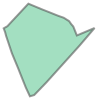

In [4]:
DL['geometry'].iloc[0]

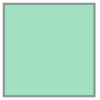

In [6]:
G = np.random.choice(DL['geometry'].geometry.values)

squares   = split_polygon(G,shape='square',thresh=0,side_length=0.005)
lst_squares = squares
geo_series = gpd.GeoSeries(lst_squares)
geo_series.iloc[-1]

In [39]:
from render_report import merging_row, open_img
import os
import cv2
import matplotlib.pyplot as plt

index1=[i for i in range(2,4)]
index2 = np.arange(1, -1, -1)
index = [index1, index2]

# root="data/images/Lâm Đồng/Đà Lạt/12"
root ="data/images/Hồ Chí Minh city/Quận 1/Nguyễn Cư Trinh"
# big_images=merging_row(index[0], folder_path=root)
for i in range(0,4):
    image_row = open_img(root=root+f"/{i}.png")
    # image_row = cv2.resize(image_row,(1926, 1825))
    print(image_row.shape)
    # plt.imshow(image_row)
    # plt.axis('off')
    # plt.show()
# for i in index[1:]:
#     big_images=merging_row(i, folder_path=root)
#     cv2.imshow("a", big_images)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()
    # img_path = os.path.join(root, str(i[0])+".png")
    # image_row = open_img(root=img_path)
    # print(image_row.shape)

(2265, 2183, 3)
(2265, 2183, 3)
(2265, 2183, 3)
(2265, 2183, 3)


In [70]:
root = "data/images/Hồ Chí Minh city/Quận 1/Nguyễn Cư Trinh"

In [14]:
from Satellite_Image_Collector import save_size

In [24]:
def save_size(size: int, W: int, root: str):
    with open(f"{root}\\\\size.txt", "w", encoding="utf-8") as file:
        file.write(str(size) + "\n")
        file.write(str(W) + "\n")

In [25]:
root ="data\\\\mask\\\\Hồ Chí Minh city\\\\Quận 1\\\\Nguyễn Cư Trinh"
save_size(size=8,W=6,root=root)

In [27]:
a = open(root+"\\\\size.txt","r")

In [91]:
index = []
W=11
H=7
for i in range(H,1, -1):
    index.append([x for x in range(W*i-W, W*i)])
index.append(np.arange(W-1,-1,-1))
index

[[66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76],
 [55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65],
 [44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54],
 [33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43],
 [22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
 [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
 array([10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0])]

In [43]:
index1=[i for i in range(56,64)]
index2=[i for i in range(48,56)]
index3=[i for i in range(40,48)]
index4=[i for i in range(32,40)]
index5=[i for i in range(24,32)]
index6=[i for i in range(16,24)]
index7=[i for i in range(8,16)]
index8 = np.arange(7, -1, -1)
index = [index1, index2, index3, index4, index5, index6, index7, index8]
index

[[56, 57, 58, 59, 60, 61, 62, 63],
 [48, 49, 50, 51, 52, 53, 54, 55],
 [40, 41, 42, 43, 44, 45, 46, 47],
 [32, 33, 34, 35, 36, 37, 38, 39],
 [24, 25, 26, 27, 28, 29, 30, 31],
 [16, 17, 18, 19, 20, 21, 22, 23],
 [8, 9, 10, 11, 12, 13, 14, 15],
 array([7, 6, 5, 4, 3, 2, 1, 0])]

In [35]:
def read_size(root: str):
    with open(f"{root}\\\\size.txt", "r", encoding="utf-8") as file:
        # Read the width and height values from the file
        W = int(file.readline().strip())
        H = int(file.readline().strip())
    return W, H

In [36]:
root ="data\\\\mask\\\\Hồ Chí Minh city\\\\Quận 1\\\\Nguyễn Cư Trinh"
W,H  = read_size(root=root)

In [37]:
W,H

(2, 2)

In [1]:
import numpy as np
mask = np.load("data/mask/Hồ Chí Minh city/Quận 1/Nguyễn Cư Trinh/mask.npy")

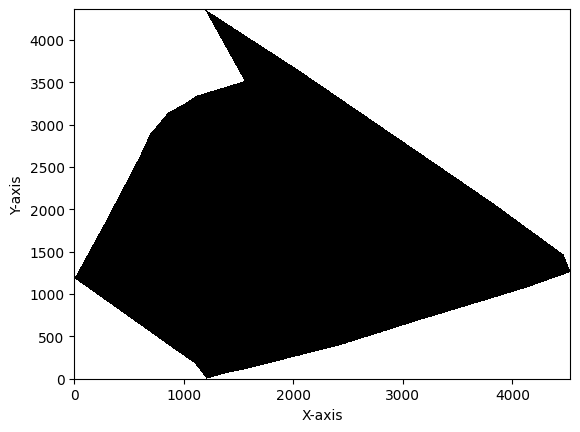

In [2]:
import matplotlib.pyplot as plt

plt.pcolormesh(mask, cmap="binary")  # Reshape for plotting

# Optional: Add labels and title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

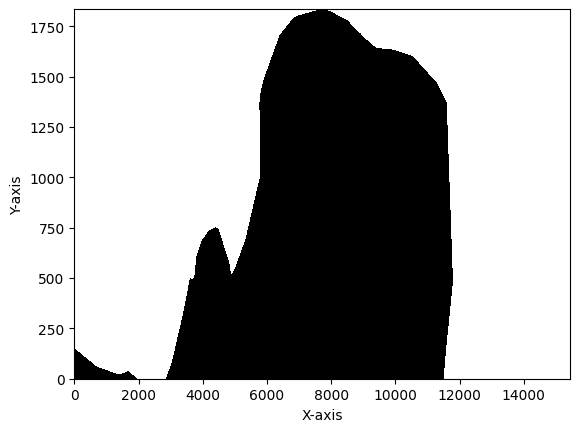

In [7]:
import numpy as np
mask = np.load("data/mask/Đồng Nai/Tân Phú/Phú Lập/mask.npy")
import matplotlib.pyplot as plt

plt.pcolormesh(mask, cmap="binary")  # Reshape for plotting

# Optional: Add labels and title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

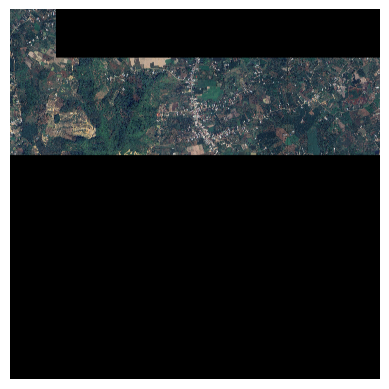

In [18]:
from PIL import Image
import cv2
from render_report import merging_row, open_img


root ="data/images/Đồng Nai/Tân Phú/Phú Lập"
image0 = open_img(root=root+f"/{0}.png")
image1 = open_img(root=root+f"/{1}.png")
image2 = open_img(root=root+f"/{2}.png")
image3 = open_img(root=root+f"/{3}.png")
image4 = open_img(root=root+f"/{4}.png")
image5 = open_img(root=root+f"/{5}.png")
image6 = open_img(root=root+f"/{6}.png")
image7 = open_img(root=root+f"/{7}.png")
image8 = open_img(root=root+f"/{8}.png")
image9 = open_img(root=root+f"/{9}.png")
image10 = open_img(root=root+f"/{10}.png")
image11 = open_img(root=root+f"/{11}.png")
image12 = open_img(root=root+f"/{12}.png")
image13 = open_img(root=root+f"/{13}.png")
image14 = open_img(root=root+f"/{14}.png")
image15 = open_img(root=root+f"/{15}.png")
image16 = open_img(root=root+f"/{16}.png")
image17 = open_img(root=root+f"/{17}.png")
image18 = open_img(root=root+f"/{18}.png")
image19 = open_img(root=root+f"/{19}.png")
image20 = open_img(root=root+f"/{20}.png")
image21 = open_img(root=root+f"/{21}.png")
image22 = open_img(root=root+f"/{22}.png")
image23 = open_img(root=root+f"/{23}.png")

image0 = Image.fromarray(cv2.cvtColor(image0, cv2.COLOR_BGR2RGB))
image1 = Image.fromarray(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
image2 = Image.fromarray(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
image3 = Image.fromarray(cv2.cvtColor(image3, cv2.COLOR_BGR2RGB))
image4 = Image.fromarray(cv2.cvtColor(image4, cv2.COLOR_BGR2RGB))
image5 = Image.fromarray(cv2.cvtColor(image5, cv2.COLOR_BGR2RGB))
image6 = Image.fromarray(cv2.cvtColor(image6, cv2.COLOR_BGR2RGB))
image7 = Image.fromarray(cv2.cvtColor(image7, cv2.COLOR_BGR2RGB))
image8 = Image.fromarray(cv2.cvtColor(image8, cv2.COLOR_BGR2RGB))
image9 = Image.fromarray(cv2.cvtColor(image9, cv2.COLOR_BGR2RGB))
image10 = Image.fromarray(cv2.cvtColor(image10, cv2.COLOR_BGR2RGB))
image11 = Image.fromarray(cv2.cvtColor(image11, cv2.COLOR_BGR2RGB))
image12 = Image.fromarray(cv2.cvtColor(image12, cv2.COLOR_BGR2RGB))
image13 = Image.fromarray(cv2.cvtColor(image13, cv2.COLOR_BGR2RGB))
image14 = Image.fromarray(cv2.cvtColor(image14, cv2.COLOR_BGR2RGB))
image15 = Image.fromarray(cv2.cvtColor(image15, cv2.COLOR_BGR2RGB))
image16 = Image.fromarray(cv2.cvtColor(image16, cv2.COLOR_BGR2RGB))
image17 = Image.fromarray(cv2.cvtColor(image17, cv2.COLOR_BGR2RGB))
image18 = Image.fromarray(cv2.cvtColor(image18, cv2.COLOR_BGR2RGB))
image19 = Image.fromarray(cv2.cvtColor(image19, cv2.COLOR_BGR2RGB))
image20 = Image.fromarray(cv2.cvtColor(image20, cv2.COLOR_BGR2RGB))
image21 = Image.fromarray(cv2.cvtColor(image21, cv2.COLOR_BGR2RGB))
image22 = Image.fromarray(cv2.cvtColor(image22, cv2.COLOR_BGR2RGB))
image23 = Image.fromarray(cv2.cvtColor(image23, cv2.COLOR_BGR2RGB))

merged_width = image1.width*8
merged_height = image1.width*8

merged_image = Image.new('RGB', (merged_width, merged_height))
merged_image.paste(image16, (0, 0))

merged_image.paste(image8, (0, image1.height))
merged_image.paste(image9, (image1.width, image1.height))
merged_image.paste(image10, (image1.width*2, image1.height))
merged_image.paste(image11, (image1.width*3, image1.height))
merged_image.paste(image12, (image1.width*4, image1.height))
merged_image.paste(image13, (image1.width*5, image1.height))
merged_image.paste(image14, (image1.width*6, image1.height))
merged_image.paste(image15, (image1.width*7, image1.height))

merged_image.paste(image7, (0, image1.height*2))
merged_image.paste(image6, (image1.width, image1.height*2))
merged_image.paste(image5, (image1.width*2, image1.height*2))
merged_image.paste(image4, (image1.width*3, image1.height*2))
merged_image.paste(image3, (image1.width*4, image1.height*2))
merged_image.paste(image2, (image1.width*5, image1.height*2))
merged_image.paste(image1, (image1.width*6, image1.height*2))
merged_image.paste(image0, (image1.width*7, image1.height*2))


plt.imshow(merged_image)
plt.axis('off')
plt.show()


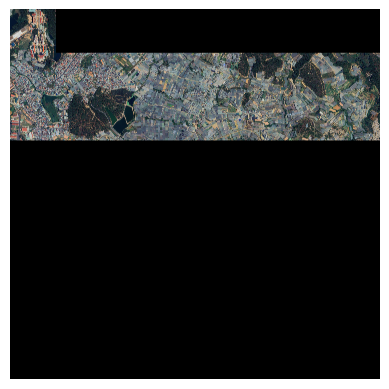

In [63]:
from PIL import Image

root ="data/images/Lâm Đồng/Đà Lạt/12"
image0 = open_img(root=root+f"/{0}.png")
image1 = open_img(root=root+f"/{1}.png")
image2 = open_img(root=root+f"/{2}.png")
image3 = open_img(root=root+f"/{3}.png")
image4 = open_img(root=root+f"/{4}.png")
image5 = open_img(root=root+f"/{5}.png")
image6 = open_img(root=root+f"/{6}.png")
image7 = open_img(root=root+f"/{7}.png")
image8 = open_img(root=root+f"/{8}.png")
image9 = open_img(root=root+f"/{9}.png")
image10 = open_img(root=root+f"/{10}.png")
image11 = open_img(root=root+f"/{11}.png")
image12 = open_img(root=root+f"/{12}.png")
image13 = open_img(root=root+f"/{13}.png")
image14 = open_img(root=root+f"/{14}.png")
image15 = open_img(root=root+f"/{15}.png")
image16 = open_img(root=root+f"/{16}.png")
image17 = open_img(root=root+f"/{17}.png")
image18 = open_img(root=root+f"/{18}.png")
image19 = open_img(root=root+f"/{19}.png")
image20 = open_img(root=root+f"/{20}.png")
image21 = open_img(root=root+f"/{21}.png")
image22 = open_img(root=root+f"/{22}.png")
image23 = open_img(root=root+f"/{23}.png")

image0 = Image.fromarray(cv2.cvtColor(image0, cv2.COLOR_BGR2RGB))
image1 = Image.fromarray(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
image2 = Image.fromarray(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
image3 = Image.fromarray(cv2.cvtColor(image3, cv2.COLOR_BGR2RGB))
image4 = Image.fromarray(cv2.cvtColor(image4, cv2.COLOR_BGR2RGB))
image5 = Image.fromarray(cv2.cvtColor(image5, cv2.COLOR_BGR2RGB))
image6 = Image.fromarray(cv2.cvtColor(image6, cv2.COLOR_BGR2RGB))
image7 = Image.fromarray(cv2.cvtColor(image7, cv2.COLOR_BGR2RGB))
image8 = Image.fromarray(cv2.cvtColor(image8, cv2.COLOR_BGR2RGB))
image9 = Image.fromarray(cv2.cvtColor(image9, cv2.COLOR_BGR2RGB))
image10 = Image.fromarray(cv2.cvtColor(image10, cv2.COLOR_BGR2RGB))
image11 = Image.fromarray(cv2.cvtColor(image11, cv2.COLOR_BGR2RGB))
image12 = Image.fromarray(cv2.cvtColor(image12, cv2.COLOR_BGR2RGB))
image13 = Image.fromarray(cv2.cvtColor(image13, cv2.COLOR_BGR2RGB))
image14 = Image.fromarray(cv2.cvtColor(image14, cv2.COLOR_BGR2RGB))
image15 = Image.fromarray(cv2.cvtColor(image15, cv2.COLOR_BGR2RGB))
image16 = Image.fromarray(cv2.cvtColor(image16, cv2.COLOR_BGR2RGB))
image17 = Image.fromarray(cv2.cvtColor(image17, cv2.COLOR_BGR2RGB))
image18 = Image.fromarray(cv2.cvtColor(image18, cv2.COLOR_BGR2RGB))
image19 = Image.fromarray(cv2.cvtColor(image19, cv2.COLOR_BGR2RGB))
image20 = Image.fromarray(cv2.cvtColor(image20, cv2.COLOR_BGR2RGB))
image21 = Image.fromarray(cv2.cvtColor(image21, cv2.COLOR_BGR2RGB))
image22 = Image.fromarray(cv2.cvtColor(image22, cv2.COLOR_BGR2RGB))
image23 = Image.fromarray(cv2.cvtColor(image23, cv2.COLOR_BGR2RGB))

merged_width = image1.width*8
merged_height = image1.width*8

merged_image = Image.new('RGB', (merged_width, merged_height))
merged_image.paste(image16, (0, 0))

merged_image.paste(image8, (0, image1.height))
merged_image.paste(image9, (image1.width, image1.height))
merged_image.paste(image10, (image1.width*2, image1.height))
merged_image.paste(image11, (image1.width*3, image1.height))
merged_image.paste(image12, (image1.width*4, image1.height))
merged_image.paste(image13, (image1.width*5, image1.height))
merged_image.paste(image14, (image1.width*6, image1.height))
merged_image.paste(image15, (image1.width*7, image1.height))

merged_image.paste(image7, (0, image1.height*2))
merged_image.paste(image6, (image1.width, image1.height*2))
merged_image.paste(image5, (image1.width*2, image1.height*2))
merged_image.paste(image4, (image1.width*3, image1.height*2))
merged_image.paste(image3, (image1.width*4, image1.height*2))
merged_image.paste(image2, (image1.width*5, image1.height*2))
merged_image.paste(image1, (image1.width*6, image1.height*2))
merged_image.paste(image0, (image1.width*7, image1.height*2))


plt.imshow(merged_image)
plt.axis('off')
plt.show()


In [64]:
merged_image.save("a.png")

In [36]:
maskHCM = np.load("data/mask/Hồ Chí Minh city/Quận 1/Nguyễn Cư Trinh/mask.npy")
maskHCM.shape

(2183, 4530)

In [20]:
lst_squares

[<POLYGON ((106.693 10.756, 106.687 10.756, 106.687 10.762, 106.693 10.762, 1...>,
 <POLYGON ((106.687 10.756, 106.681 10.756, 106.681 10.762, 106.687 10.762, 1...>,
 <POLYGON ((106.681 10.762, 106.681 10.768, 106.687 10.768, 106.687 10.762, 1...>,
 <POLYGON ((106.687 10.768, 106.693 10.768, 106.693 10.762, 106.687 10.762, 1...>]

In [13]:
data = read_geopandas_data()
data

5485    POLYGON ((108.49611 11.96060, 108.49569 11.960...
Name: geometry, dtype: geometry

In [30]:
side_length=0.025
data.envelope

5485    POLYGON ((108.46599 11.95429, 108.50732 11.954...
dtype: geometry

In [31]:
data.bounds

,minx,miny,maxx,maxy
5485,108.465988,11.954291,108.507317,11.992592


In [32]:
x1, y1, x2, y2 = data.bounds.iloc[0]
width = x2 - x1
height = y2 - y1
x1, y1, x2, y2

(108.4659881591798, 11.954291343689022, 108.50731658935553, 11.992591857910156)

In [33]:
xcells = int(np.round(width / side_length))
ycells = int(np.round(height / side_length))
xcells, ycells

(2, 2)

In [34]:
yindices = np.linspace(y1, y2, ycells + 1)
xindices = np.linspace(x1, x2, xcells + 1)
xindices,yindices

(array([108.46598816, 108.48665237, 108.50731659]),
 array([11.95429134, 11.9734416 , 11.99259186]))

In [35]:
horizontal_splitters = [
        LineString([(x, yindices[0]), (x, yindices[-1])]) for x in xindices
    ]
vertical_splitters = [
    LineString([(xindices[0], y), (xindices[-1], y)]) for y in yindices
]
horizontal_splitters, vertical_splitters

([<LINESTRING (108.466 11.954, 108.466 11.993)>,
  <LINESTRING (108.487 11.954, 108.487 11.993)>,
  <LINESTRING (108.507 11.954, 108.507 11.993)>],
 [<LINESTRING (108.466 11.954, 108.507 11.954)>,
  <LINESTRING (108.466 11.973, 108.507 11.973)>,
  <LINESTRING (108.466 11.993, 108.507 11.993)>])

In [36]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

G = np.random.choice(data.geometry.values)

In [37]:
Rectangle    = G.envelope
squares      = get_squares_from_rect(Rectangle, side_length=0.025)

In [38]:
squares

[<POLYGON ((108.507 11.954, 108.487 11.954, 108.487 11.973, 108.507 11.973, 1...>,
 <POLYGON ((108.487 11.954, 108.466 11.954, 108.466 11.973, 108.487 11.973, 1...>,
 <POLYGON ((108.466 11.973, 108.466 11.993, 108.487 11.993, 108.487 11.973, 1...>,
 <POLYGON ((108.487 11.993, 108.507 11.993, 108.507 11.973, 108.487 11.973, 1...>]

In [39]:
SquareGeoDF  = gpd.GeoSeries(squares)
SquareGeoDF

0    POLYGON ((108.50732 11.95429, 108.48665 11.954...
1    POLYGON ((108.48665 11.95429, 108.46599 11.954...
2    POLYGON ((108.46599 11.97344, 108.46599 11.992...
3    POLYGON ((108.48665 11.99259, 108.50732 11.992...
dtype: geometry

geo_series

In [40]:
SquareGeoDF = SquareGeoDF.set_crs('EPSG:32649')
SquareGeoDF

0    POLYGON ((108.507 11.954, 108.487 11.954, 108....
1    POLYGON ((108.487 11.954, 108.466 11.954, 108....
2    POLYGON ((108.466 11.973, 108.466 11.993, 108....
3    POLYGON ((108.487 11.993, 108.507 11.993, 108....
dtype: geometry

In [41]:
Geoms        = SquareGeoDF.geometry
Geoms

0    POLYGON ((108.507 11.954, 108.487 11.954, 108....
1    POLYGON ((108.487 11.954, 108.466 11.954, 108....
2    POLYGON ((108.466 11.973, 108.466 11.993, 108....
3    POLYGON ((108.487 11.993, 108.507 11.993, 108....
dtype: geometry

In [42]:
geoms = [g for g in Geoms if ((g.intersection(G)).area / g.area) >= 0.9]
geoms

[]

In [43]:
G = np.random.choice(data.geometry.values)
squares   = split_polygon(G,shape='square',thresh=0,side_length=0.005)

In [44]:
squares

[<POLYGON ((108.507 11.954, 108.502 11.954, 108.502 11.959, 108.507 11.959, 1...>,
 <POLYGON ((108.502 11.954, 108.497 11.954, 108.497 11.959, 108.502 11.959, 1...>,
 <POLYGON ((108.497 11.954, 108.492 11.954, 108.492 11.959, 108.497 11.959, 1...>,
 <POLYGON ((108.492 11.954, 108.487 11.954, 108.487 11.959, 108.492 11.959, 1...>,
 <POLYGON ((108.487 11.954, 108.481 11.954, 108.481 11.959, 108.487 11.959, 1...>,
 <POLYGON ((108.481 11.954, 108.476 11.954, 108.476 11.959, 108.481 11.959, 1...>,
 <POLYGON ((108.476 11.954, 108.471 11.954, 108.471 11.959, 108.476 11.959, 1...>,
 <POLYGON ((108.471 11.954, 108.466 11.954, 108.466 11.959, 108.471 11.959, 1...>,
 <POLYGON ((108.466 11.959, 108.466 11.964, 108.471 11.964, 108.471 11.959, 1...>,
 <POLYGON ((108.471 11.964, 108.476 11.964, 108.476 11.959, 108.471 11.959, 1...>,
 <POLYGON ((108.476 11.964, 108.481 11.964, 108.481 11.959, 108.476 11.959, 1...>,
 <POLYGON ((108.481 11.964, 108.487 11.964, 108.487 11.959, 108.481 11.959, 1...>,
 <PO

In [45]:
geo_series = gpd.GeoSeries([squares[56], squares[0]])
geo_series

0    POLYGON ((108.46599 11.98780, 108.46599 11.992...
1    POLYGON ((108.50732 11.95429, 108.50215 11.954...
dtype: geometry

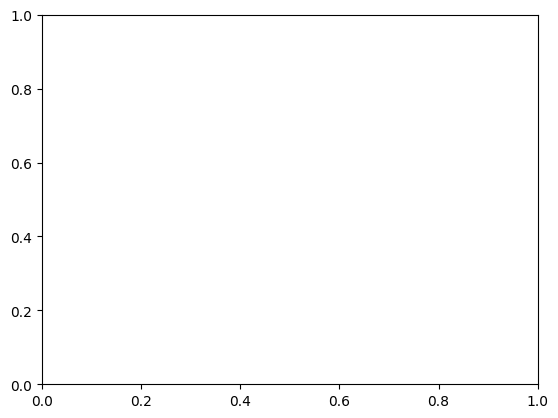

In [46]:
fig, ax = plt.subplots()

In [47]:
geo_series.plot(color = 'red', ax=ax)
data.exterior.plot(color='blue', ax= ax)
plt.show()

<Figure size 640x480 with 0 Axes>

In [48]:
from image_downloading import run


for idx, bound in enumerate(geo_series):
    #run func for downloading images and saving them
    run(idx=idx,bound=bound.bounds)
    pass

Saved as 0.png
Saved as 1.png


In [5]:
import cv2
import os

In [19]:
fi = cv2.imread("annotations\\0.png")

In [25]:
path = r"data\\annotations\\Lâm Đồng\\Đà Lạt\\12\\1.png"

In [26]:
# file_path =os.path.join(path,"1.png")
file_path=path
file_path

'data\\\\annotations\\\\Lâm Đồng\\\\Đà Lạt\\\\12\\\\1.png'

In [9]:
fi = open(file_path,"r")
fi

In [49]:
path = r"data\\annotations\\Lâm Đồng\\Đà Lạt\\12\\1.png"
unicode_path = path.encode('utf-8').decode('unicode_escape')
fi = cv2.imread(unicode_path)

In [50]:
unicode_path

'data\\annotations\\LÃ¢m Ä\x90á»\x93ng\\Ä\x90Ã\xa0 Láº¡t\\12\\1.png'

In [44]:
cv2.imshow("a",fi)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:971: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


In [63]:
import imageio.v3 as iio
import cv2
import os

# Ensure the path is correctly handled
path = "data\\annotations\\Lâm Đồng\\Đà Lạt\\12\\1.png"

# Convert to absolute path
# absolute_path = os.path.abspath(path)

# Check if the file exists
if not os.path.exists(path):
    print(f"File does not exist: {path}")
else:
    try:
        # Read the image using imageio
        image = iio.imread(path)

        # Convert the image to a format compatible with OpenCV
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # Display the image
        cv2.imshow("Image", image)
        # Wait for a key press to close the window
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    except Exception as e:
        print(f"Failed to read the image with imageio: {e}")


In [54]:
!pip install imageio

     -------------------------------------- 313.5/313.5 kB 1.6 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
mask = np.load("data/mask/")

In [27]:
from Satellite_Image_Collector import get_custom_image


geo_series = get_custom_image(data={'province':'Lâm Đồng','district':'Đà Lạt','ward':'12'})

In [28]:
geo_series[56].bounds

(108.4659881591798, 11.987804293632514, 108.47115421295177, 11.992591857910156)

In [30]:
W= 8
geo_series[geo_series.index[-1]- W+1].bounds

(108.4659881591798, 11.987804293632514, 108.47115421295177, 11.992591857910156)

In [25]:
import math
a= 66
W = 1
for i in range(2, int(a/2)+1):
    H = a/i
    if H.is_integer() and abs(H-i) <= abs(a/W-W):
        W = i
print(W)

11


In [1]:
import numpy as np
import matplotlib.pyplot as plt

mask = np.load("data/mask/Lâm Đồng/Đà Lạt/11/mask.npy")
# mask = np.load('data/mask/Hồ Chí Minh city/Quận 1/Nguyễn Cư Trinh/mask.npy')

mask.shape

(7673, 19669)

In [4]:
new_mask = mask[:, 9000:]

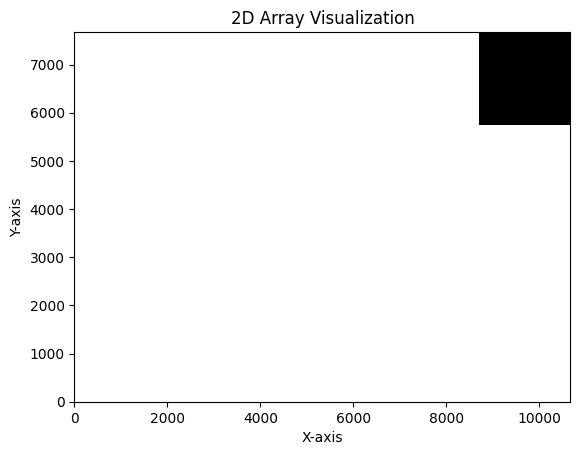

In [5]:
plt.pcolormesh(new_mask, cmap="binary")  # Reshape for plotting

# Optional: Add labels and title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("2D Array Visualization")
plt.show()